**Kier Yvanne Abot**

**BSCS 3A**

#**1. Import Libraries**

In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder, OneHotEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix

#**2.Load Dataset**

In [20]:

#Load the Dataset:
df = pd.read_csv('onlinefoods.csv')

#Missing Values:
print(df.head())
print(df.isnull().sum())

#Encode Categorical Variables:
df_dummies = pd.get_dummies(df, drop_first=True)

#Feature Selection:
X = df_dummies.drop(['Family size'], axis = 1)
y = df_dummies['Family size']

   Age  Gender Marital Status Occupation  Monthly Income  \
0   20  Female         Single    Student       No Income   
1   24  Female         Single    Student  Below Rs.10000   
2   22    Male         Single    Student  Below Rs.10000   
3   22  Female         Single    Student       No Income   
4   22    Male         Single    Student  Below Rs.10000   

  Educational Qualifications  Family size  latitude  longitude  Pin code  \
0              Post Graduate            4   12.9766    77.5993    560001   
1                   Graduate            3   12.9770    77.5773    560009   
2              Post Graduate            3   12.9551    77.6593    560017   
3                   Graduate            6   12.9473    77.5616    560019   
4              Post Graduate            4   12.9850    77.5533    560010   

  Output   Feedback Unnamed: 12  
0    Yes   Positive         Yes  
1    Yes   Positive         Yes  
2    Yes  Negative          Yes  
3    Yes   Positive         Yes  
4    Yes   P

#**3.Exploratory Data Analysis**

              Age  Family size    latitude   longitude       Pin code
count  388.000000   388.000000  388.000000  388.000000     388.000000
mean    24.628866     3.280928   12.972058   77.600160  560040.113402
std      2.975593     1.351025    0.044489    0.051354      31.399609
min     18.000000     1.000000   12.865200   77.484200  560001.000000
25%     23.000000     2.000000   12.936900   77.565275  560010.750000
50%     24.000000     3.000000   12.977000   77.592100  560033.500000
75%     26.000000     4.000000   12.997025   77.630900  560068.000000
max     33.000000     6.000000   13.102000   77.758200  560109.000000


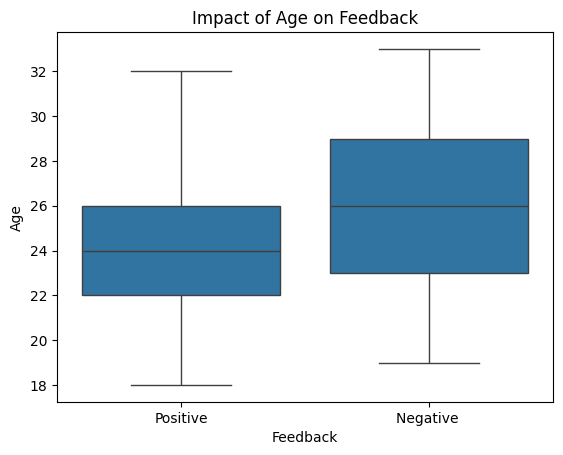

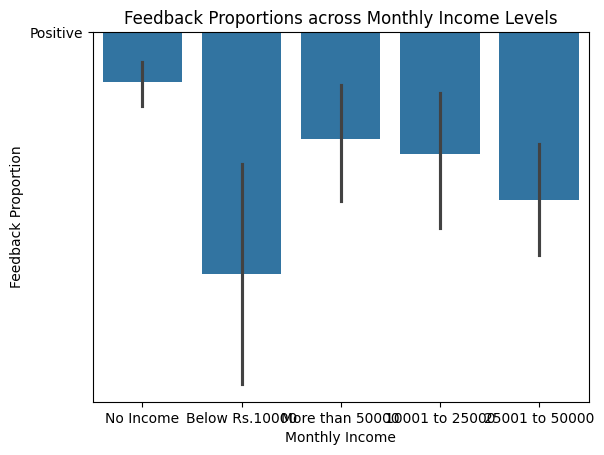

In [21]:
print(df.describe())

sns.boxplot(x='Feedback', y='Age', data=df)
plt.xlabel('Feedback')
plt.ylabel('Age')
plt.title('Impact of Age on Feedback')
plt.show()

sns.barplot(x='Monthly Income', y='Feedback', data=df)
plt.xlabel('Monthly Income')
plt.ylabel('Feedback Proportion')
plt.title('Feedback Proportions across Monthly Income Levels')
plt.show()



#4.Linear and Logistic Model

In [22]:
# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Logistic Regression Model
logreg_model = LogisticRegression()
logreg_model.fit(X_train_scaled, y_train)


# Model Evaluation


y_pred = logreg_model.predict(X_test_scaled)
conf_matrix = confusion_matrix(y_test, y_pred)

# Calculate evaluation metrics
true_positive = conf_matrix[1, 1]
false_positive = conf_matrix[0, 1]
true_negative = conf_matrix[0, 0]
false_negative = conf_matrix[1, 0]

# Calculate accuracy
accuracy = (true_positive + true_negative) / float(true_positive + false_positive + true_negative + false_negative)

# Calculate precision
precision = true_positive / float(true_positive + false_positive)

# Calculate recall
recall = true_positive / float(true_positive + false_negative)

# Calculate F1-score
f1 = 2 * (precision * recall) / (precision + recall)

print("\nLogistic Regression Model Evaluation:")
print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1}")
print("Confusion Matrix:")
print(conf_matrix)



Logistic Regression Model Evaluation:
Accuracy: 0.7777777777777778
Precision: 0.7777777777777778
Recall: 1.0
F1 Score: 0.8750000000000001
Confusion Matrix:
[[ 0  2  0  0  0  0]
 [ 0  7  6  1  3  1]
 [ 0  6 11  0  4  2]
 [ 0  8  7  2  1  0]
 [ 0  3  4  1  2  0]
 [ 0  5  1  0  0  1]]


#**5. Comparative Analysis and Visualization**

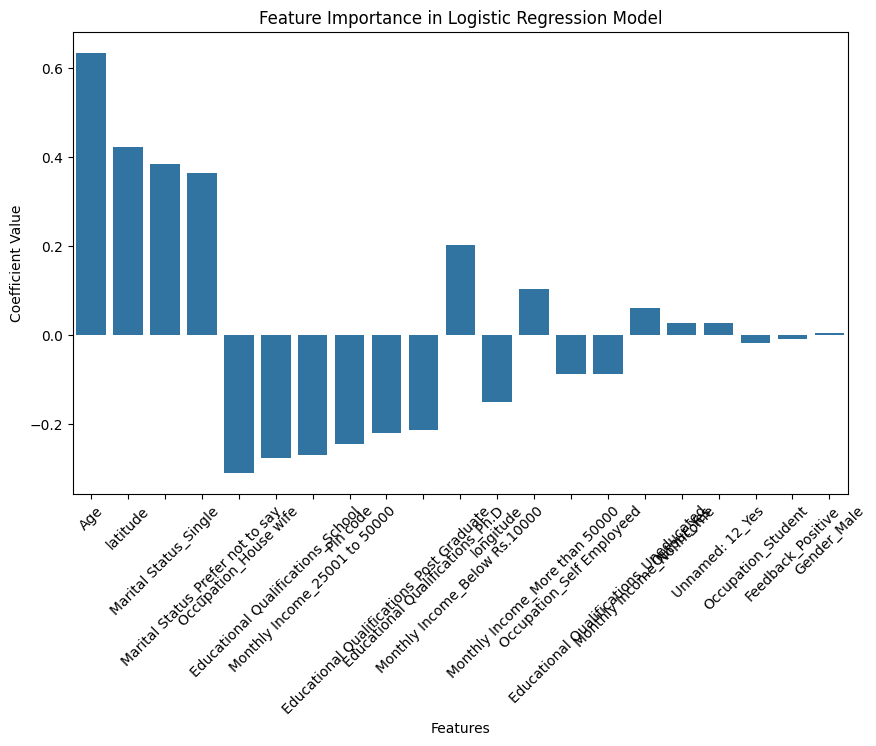

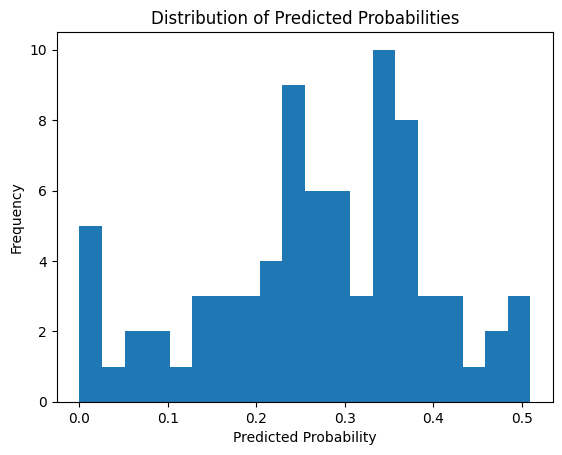

In [23]:
# Feature Importance Visualization
coefficients = pd.DataFrame(logreg_model.coef_[0], index=X.columns, columns=['Coefficient'])
coefficients['AbsoluteCoefficient'] = np.abs(coefficients['Coefficient'])
coefficients.sort_values(by='AbsoluteCoefficient', ascending=False, inplace=True)

plt.figure(figsize=(10, 6))
sns.barplot(x=coefficients.index, y=coefficients['Coefficient'])
plt.xlabel('Features')
plt.ylabel('Coefficient Value')
plt.title('Feature Importance in Logistic Regression Model')
plt.xticks(rotation=45)
plt.show()

# Prediction Insights
y_pred_prob = logreg_model.predict_proba(X_test_scaled)[:, 1]
plt.hist(y_pred_prob, bins=20)
plt.xlabel('Predicted Probability')
plt.ylabel('Frequency')
plt.title('Distribution of Predicted Probabilities')
plt.show()

